In [14]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
%matplotlib inline

In [2]:
# Read the data from the csv file
data = pd.read_csv('../data/clustering_diabetesdata.csv')
data.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Numb_of_Times_Preg          768 non-null    int64  
 1   PlasmaglucoseConcentration  768 non-null    int64  
 2   BloodPressure               768 non-null    int64  
 3   SkinFoldThickness           768 non-null    int64  
 4   SerumInsulin                768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DiabetesPedigreeFunction    768 non-null    float64
 7   Age                         768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [6]:
data.describe()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
# pre processing the zero values
data.replace(0, data.mean(), inplace=True)

In [11]:
data.head()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


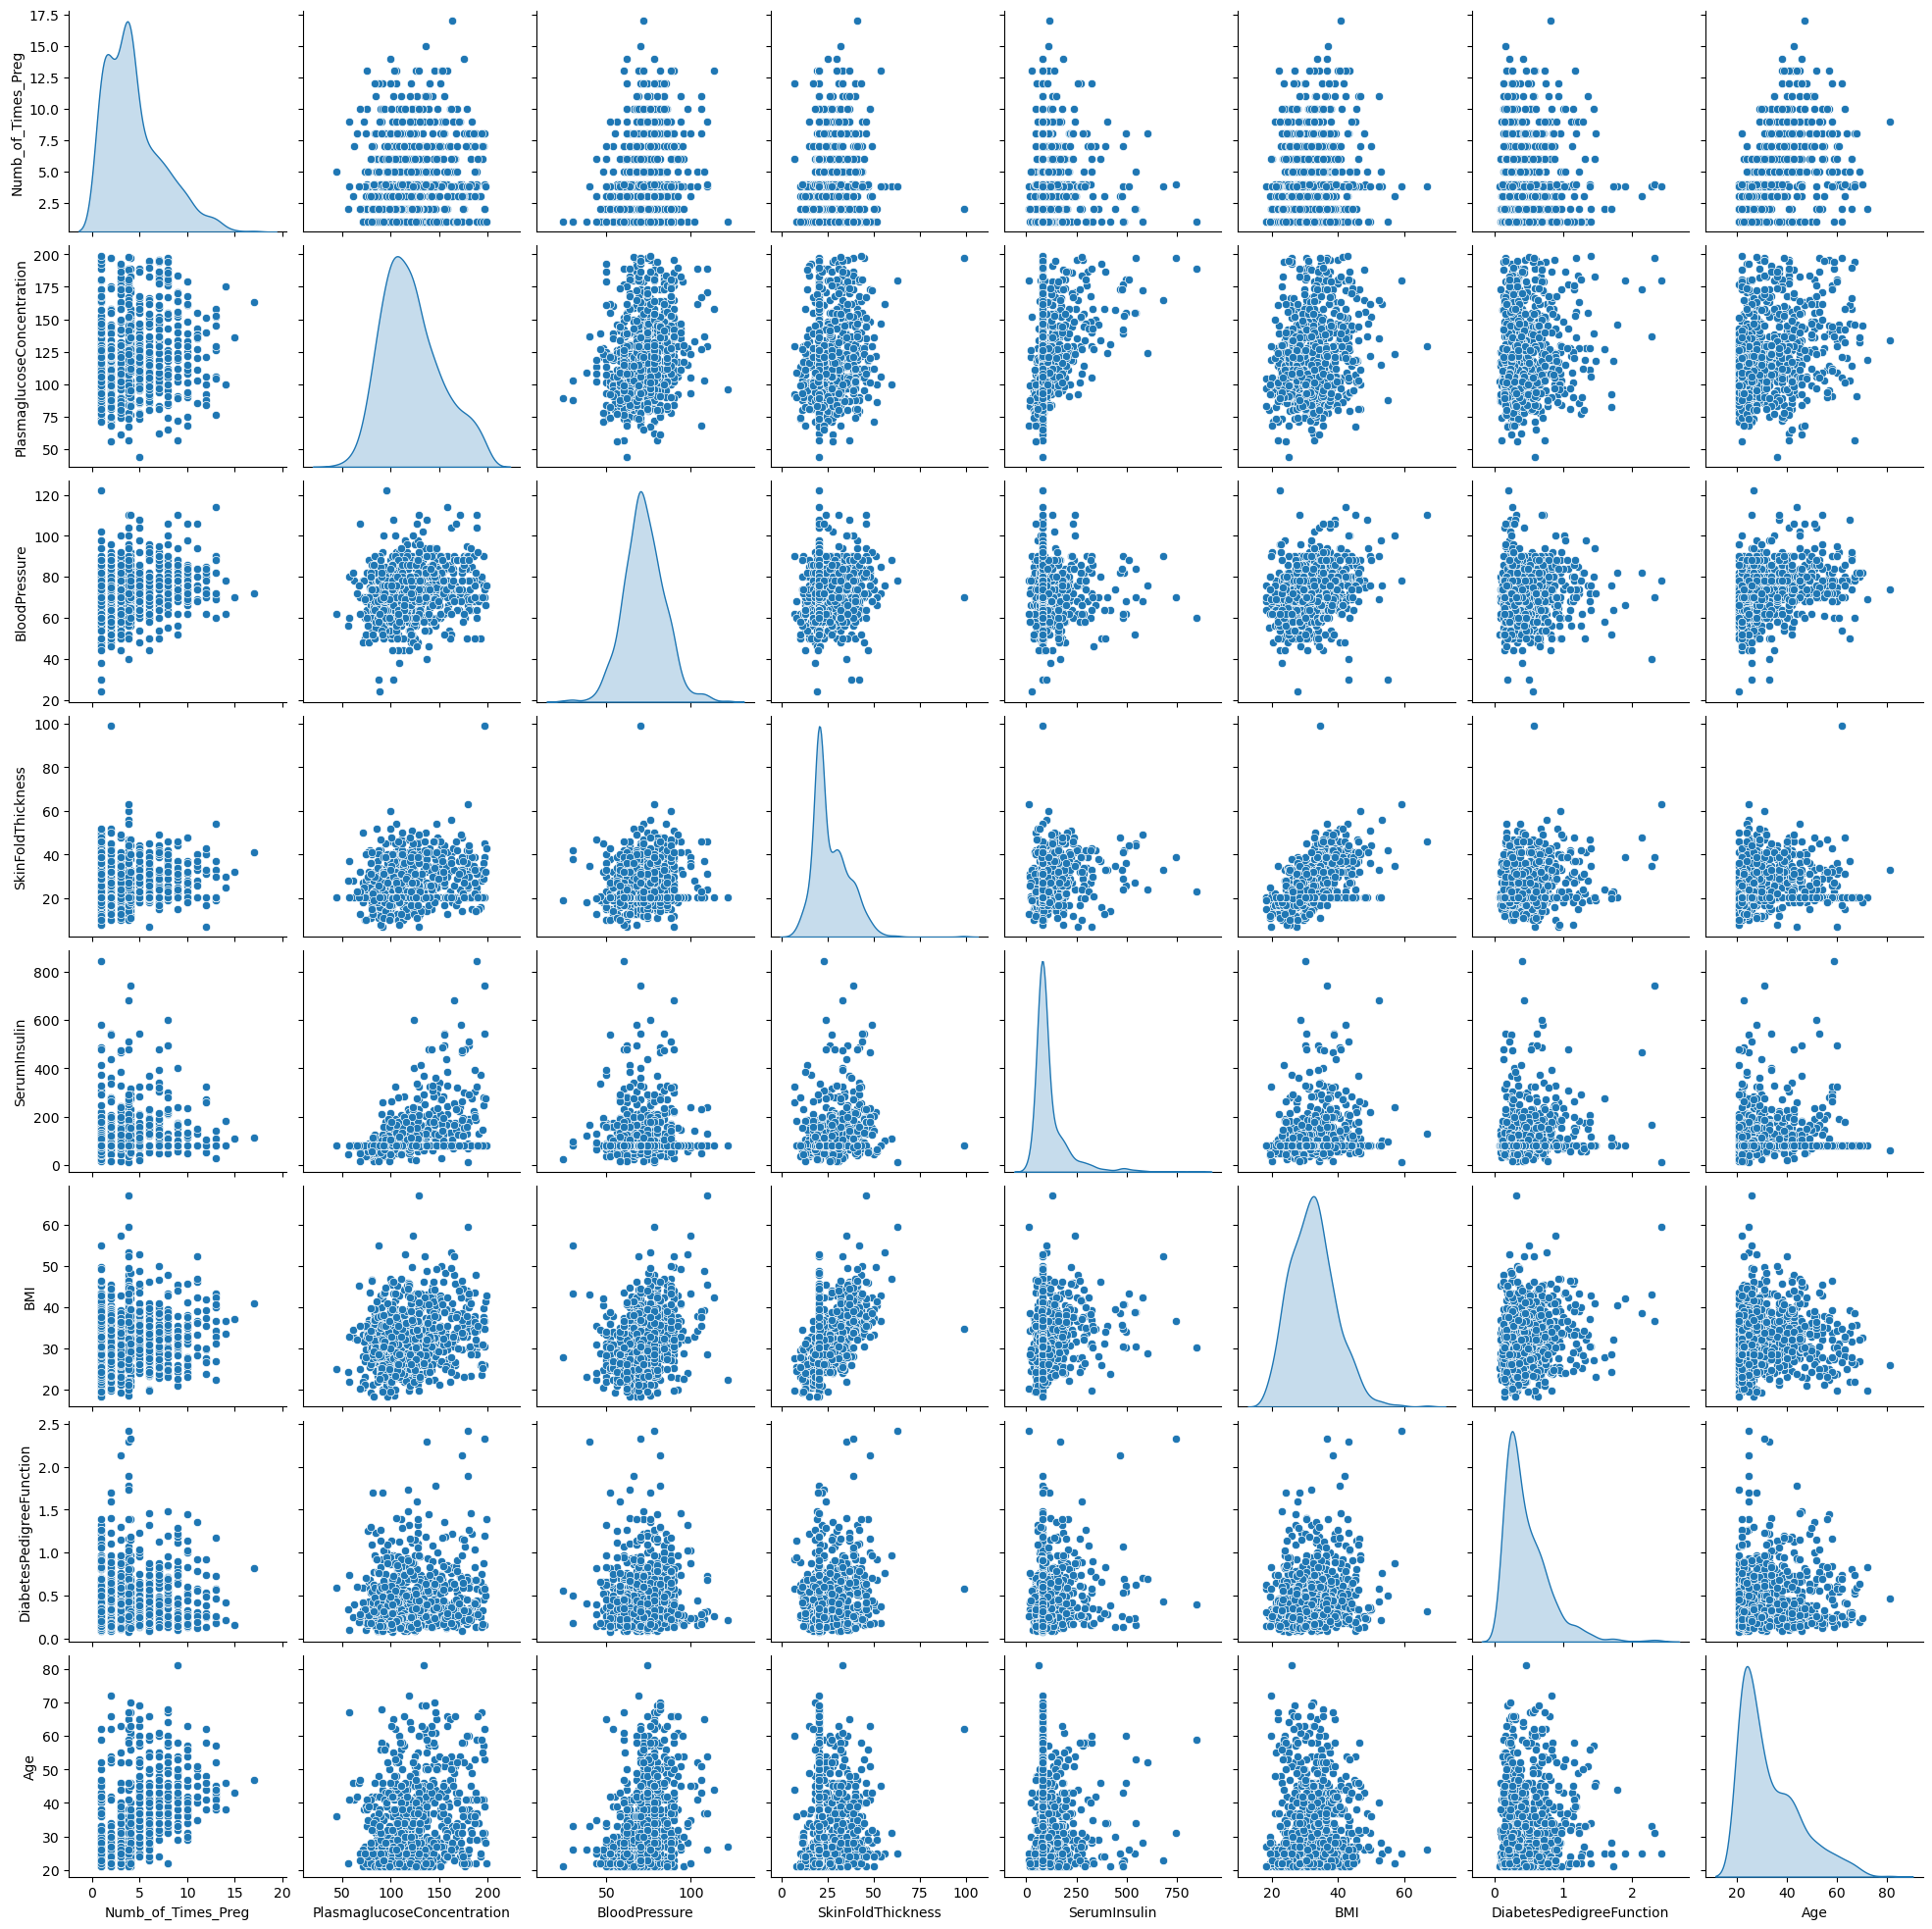

In [12]:
# pairplot to check for correlation
import seaborn as sns
sns.pairplot(data, diag_kind = "kde")


In [13]:
from sklearn.preprocessing import MinMaxScaler
X = data.values
Clus_dataSet = MinMaxScaler().fit_transform(X)
Clus_dataSet

array([[0.3125    , 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.        , 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.4375    , 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.25      , 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.        , 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.        , 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [15]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(init = "k-means++", n_clusters = i, n_init = 12)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

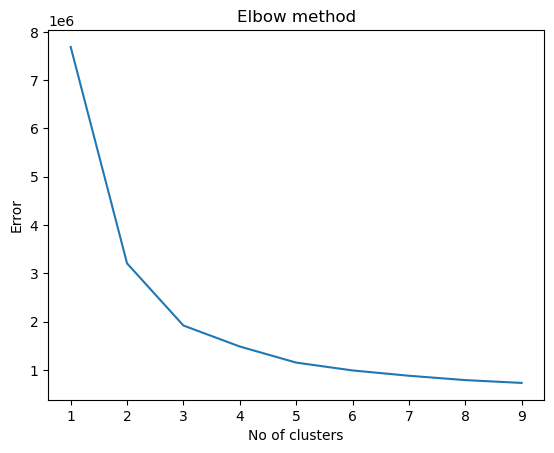

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [17]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 0 0 0 2 0 0 0 1 0 0 0 0 1 2 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0
 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0
 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 0 2 0 2 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 1 0
 0 2 0 0 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 2 2 0 0 1 1 0 0 0 0 0 2 0 0 0 1
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 1 2 0 0 0 0 2 2 0 0
 1 2 2 0 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 2 0 0 0 0 0 0
 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 2 0 0 0 0 0
 1 0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 1 0 0 2 0 0 0 0 0 0 0 0 0 2 0
 0 0 1 0 2 2 0 2 1 0 0 0 0 2 0 0 0 2 2 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 2 1 2 0 0 0 0 0 

In [25]:
# assign the labels to the data
data["Clus_group"] = labels
data.head(5)

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age,Clus_group
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,0
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,2


In [30]:
import plotly.express as px
fig = px.scatter(data, x="Age", y="Numb_of_Times_Preg", color="Clus_group",
                 size='Numb_of_Times_Preg', hover_data=['DiabetesPedigreeFunction'])
fig.show()

In [31]:
data.groupby('Clus_group').mean()

,Numb_of_Times_Preg,PlasmaglucoseConcentration,BloodPressure,SkinFoldThickness,SerumInsulin,BMI,DiabetesPedigreeFunction,Age
Clus_group,,,,,,,,
0,4.453157,116.411962,72.170545,25.412461,82.213824,31.819603,0.439416,33.134868
1,3.861406,162.320000,70.800000,33.040000,503.200000,35.584000,0.596560,33.360000
2,4.264786,137.888889,72.903704,30.792593,211.592593,34.713333,0.594978,33.696296


##  Hierarchical clustering

In [32]:
from sklearn.metrics.pairwise import euclidean_distances
import pylab
dist_matrix = euclidean_distances(Clus_dataSet,Clus_dataSet) 
print(dist_matrix)

[[0.         0.63680339 0.48241998 ... 0.46192725 0.42334916 0.671121  ]
 [0.63680339 0.         0.78971775 ... 0.35824104 0.39801391 0.16986847]
 [0.48241998 0.78971775 0.         ... 0.49183822 0.65510667 0.78234033]
 ...
 [0.46192725 0.35824104 0.49183822 ... 0.         0.41153344 0.35565429]
 [0.42334916 0.39801391 0.65510667 ... 0.41153344 0.         0.47845999]
 [0.671121   0.16986847 0.78234033 ... 0.35565429 0.47845999 0.        ]]


In [33]:
from scipy.cluster import hierarchy 
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_85738/1713206993.py:2: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



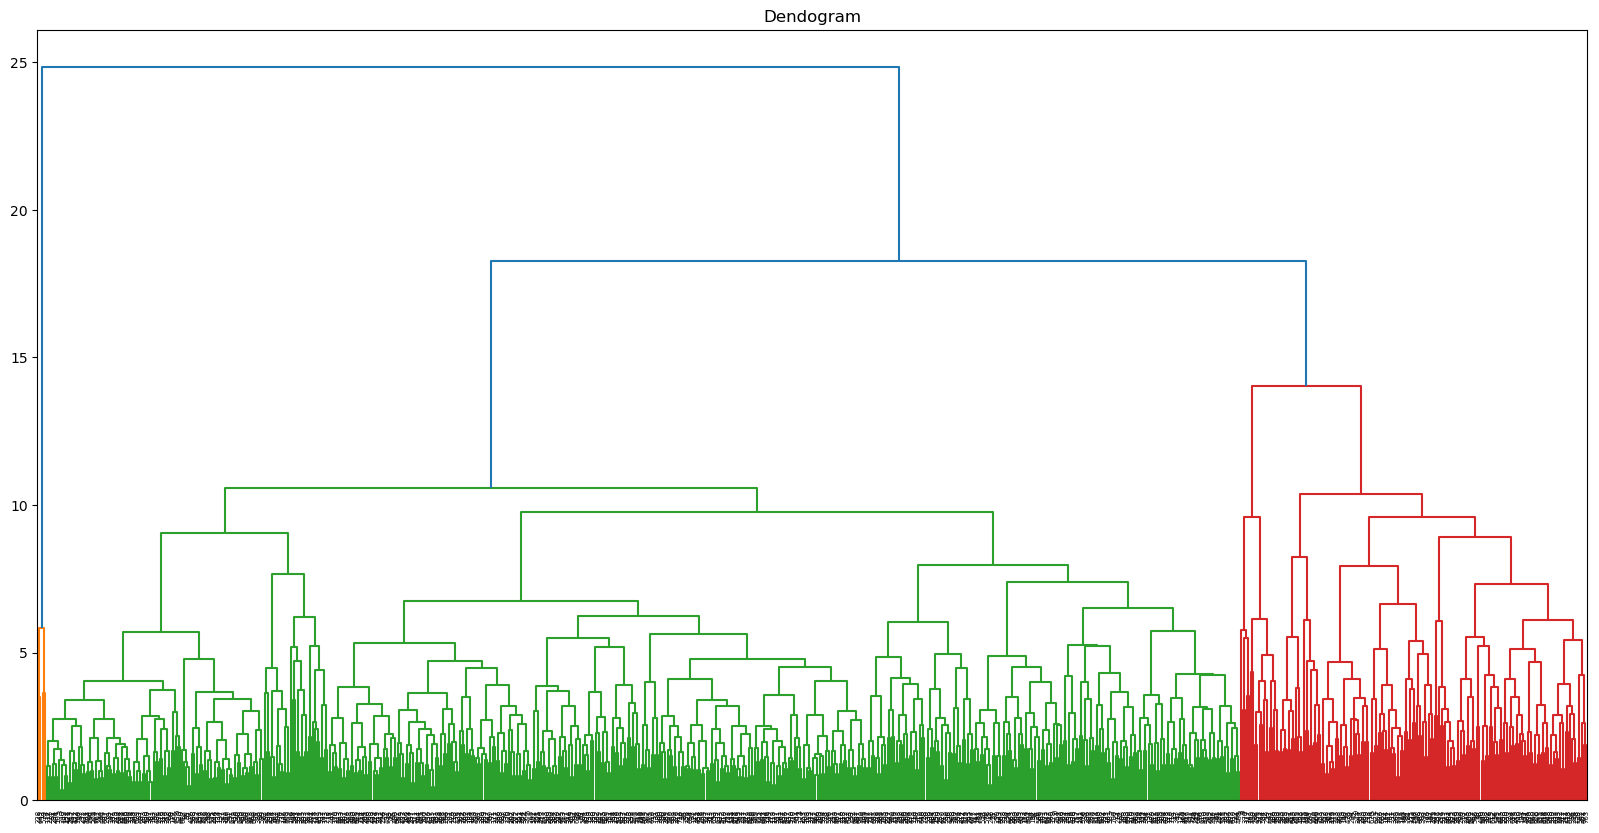

In [38]:
plt.rc("figure", figsize = (20,10))
dendro = hierarchy.dendrogram(Z_using_dist_matrix)
plt.title('Dendogram')
plt.show()